Q2: Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd

In [2]:
fraud = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/assignments/Fraudcheck.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


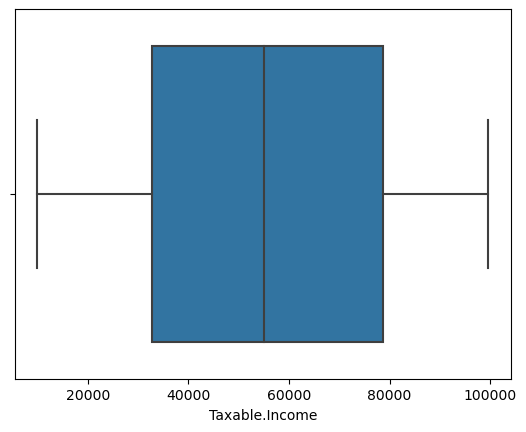

In [8]:
import seaborn as sns
box = sns.boxplot(fraud['Taxable.Income'])

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=9,5

skew: 0.030014788906377175
kurt: -1.1997824607083138


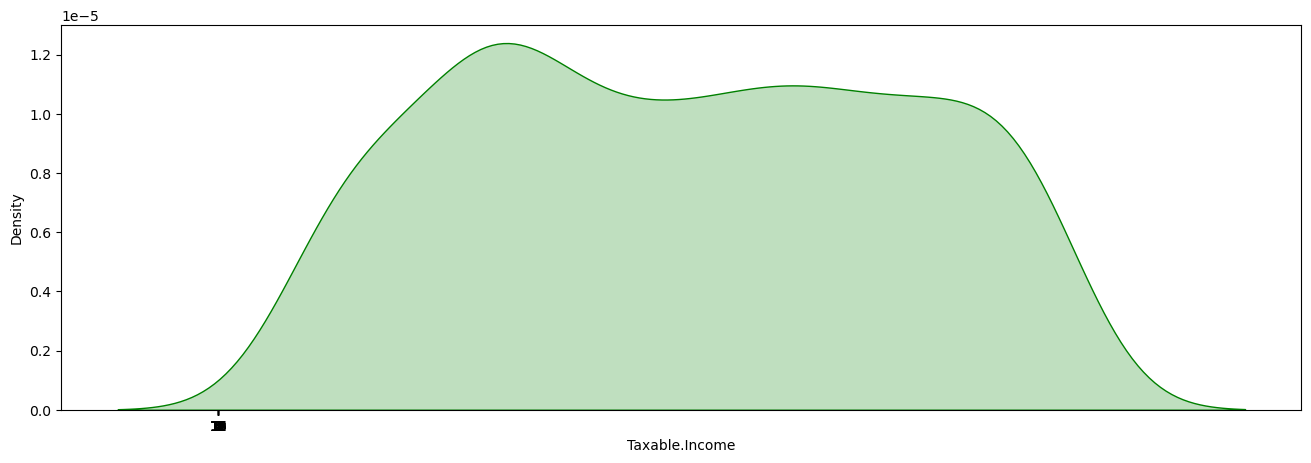

In [10]:
plt.figure(figsize=(16,5))
print('skew: {}'.format(fraud['Taxable.Income'].skew()))
print('kurt: {}'.format(fraud['Taxable.Income'].kurtosis()))
kde = sns.kdeplot(fraud['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

THIS DATA HAS NEGATIVE KURTOSIS AND RIGHT SKEWED

In [12]:
col_obj = fraud.select_dtypes(include='object').columns.tolist()

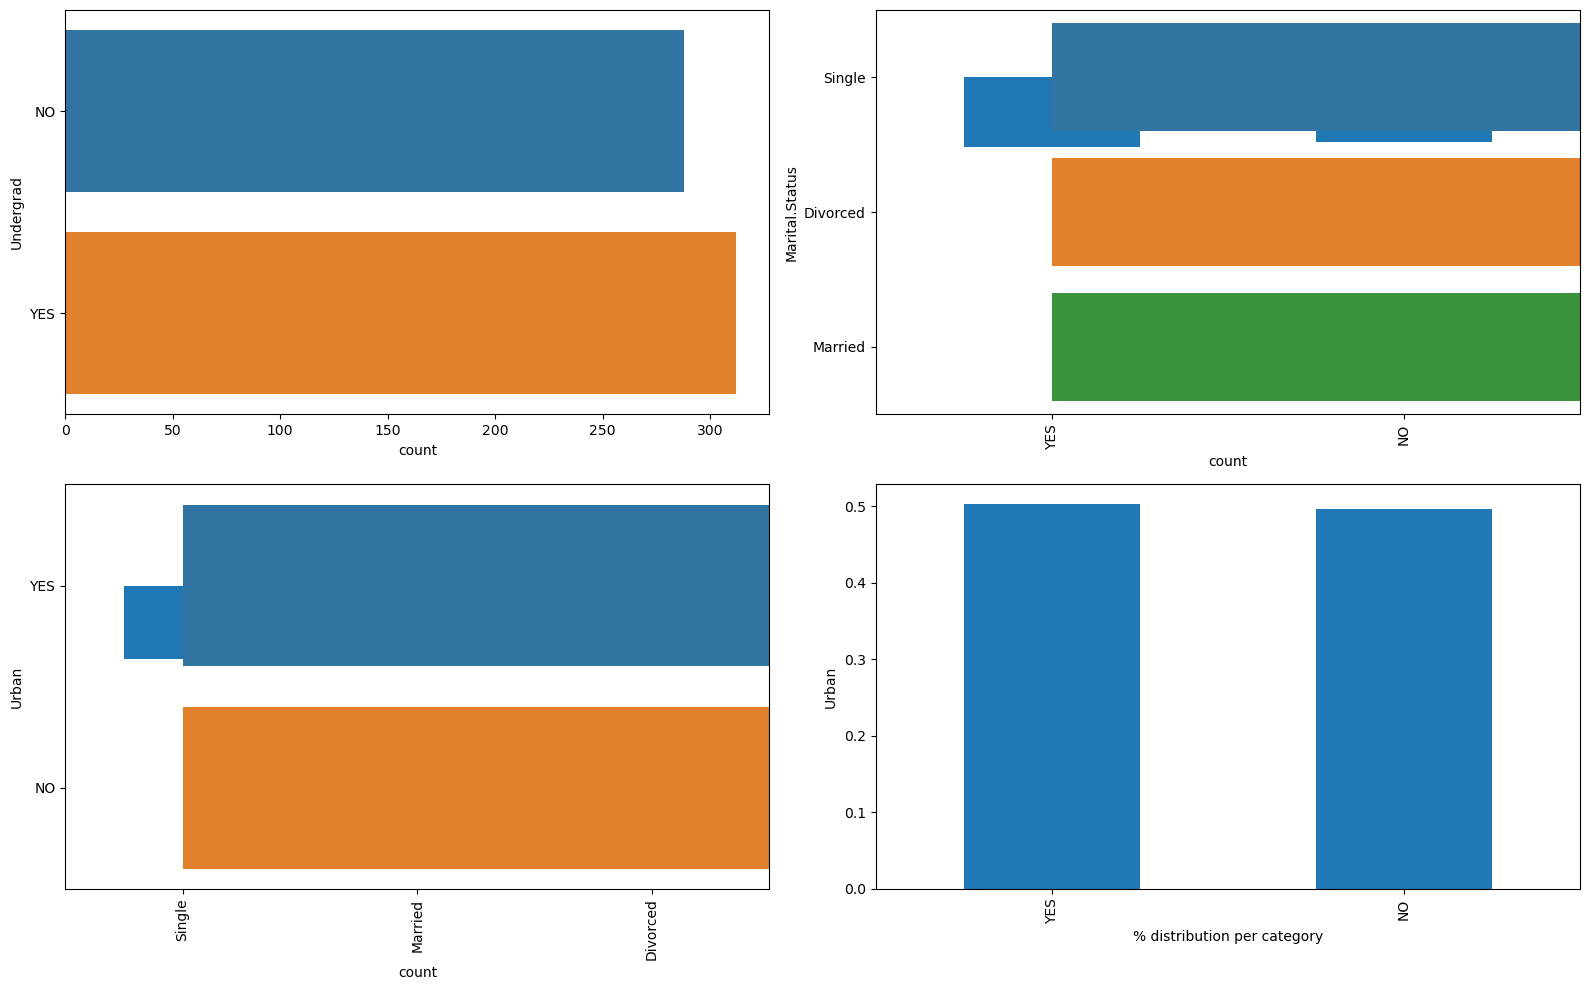

In [13]:
plt.figure(figsize=(16,10))
for i,col in enumerate(col_obj,1):
  plt.subplot(2,2,i)
  sns.countplot(data=fraud,y=col)
  plt.subplot(2,2,i+1)
  fraud[col].value_counts(normalize=True).plot.bar()
  plt.ylabel(col)
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [14]:
col_num = fraud.select_dtypes(exclude='object').columns.tolist()

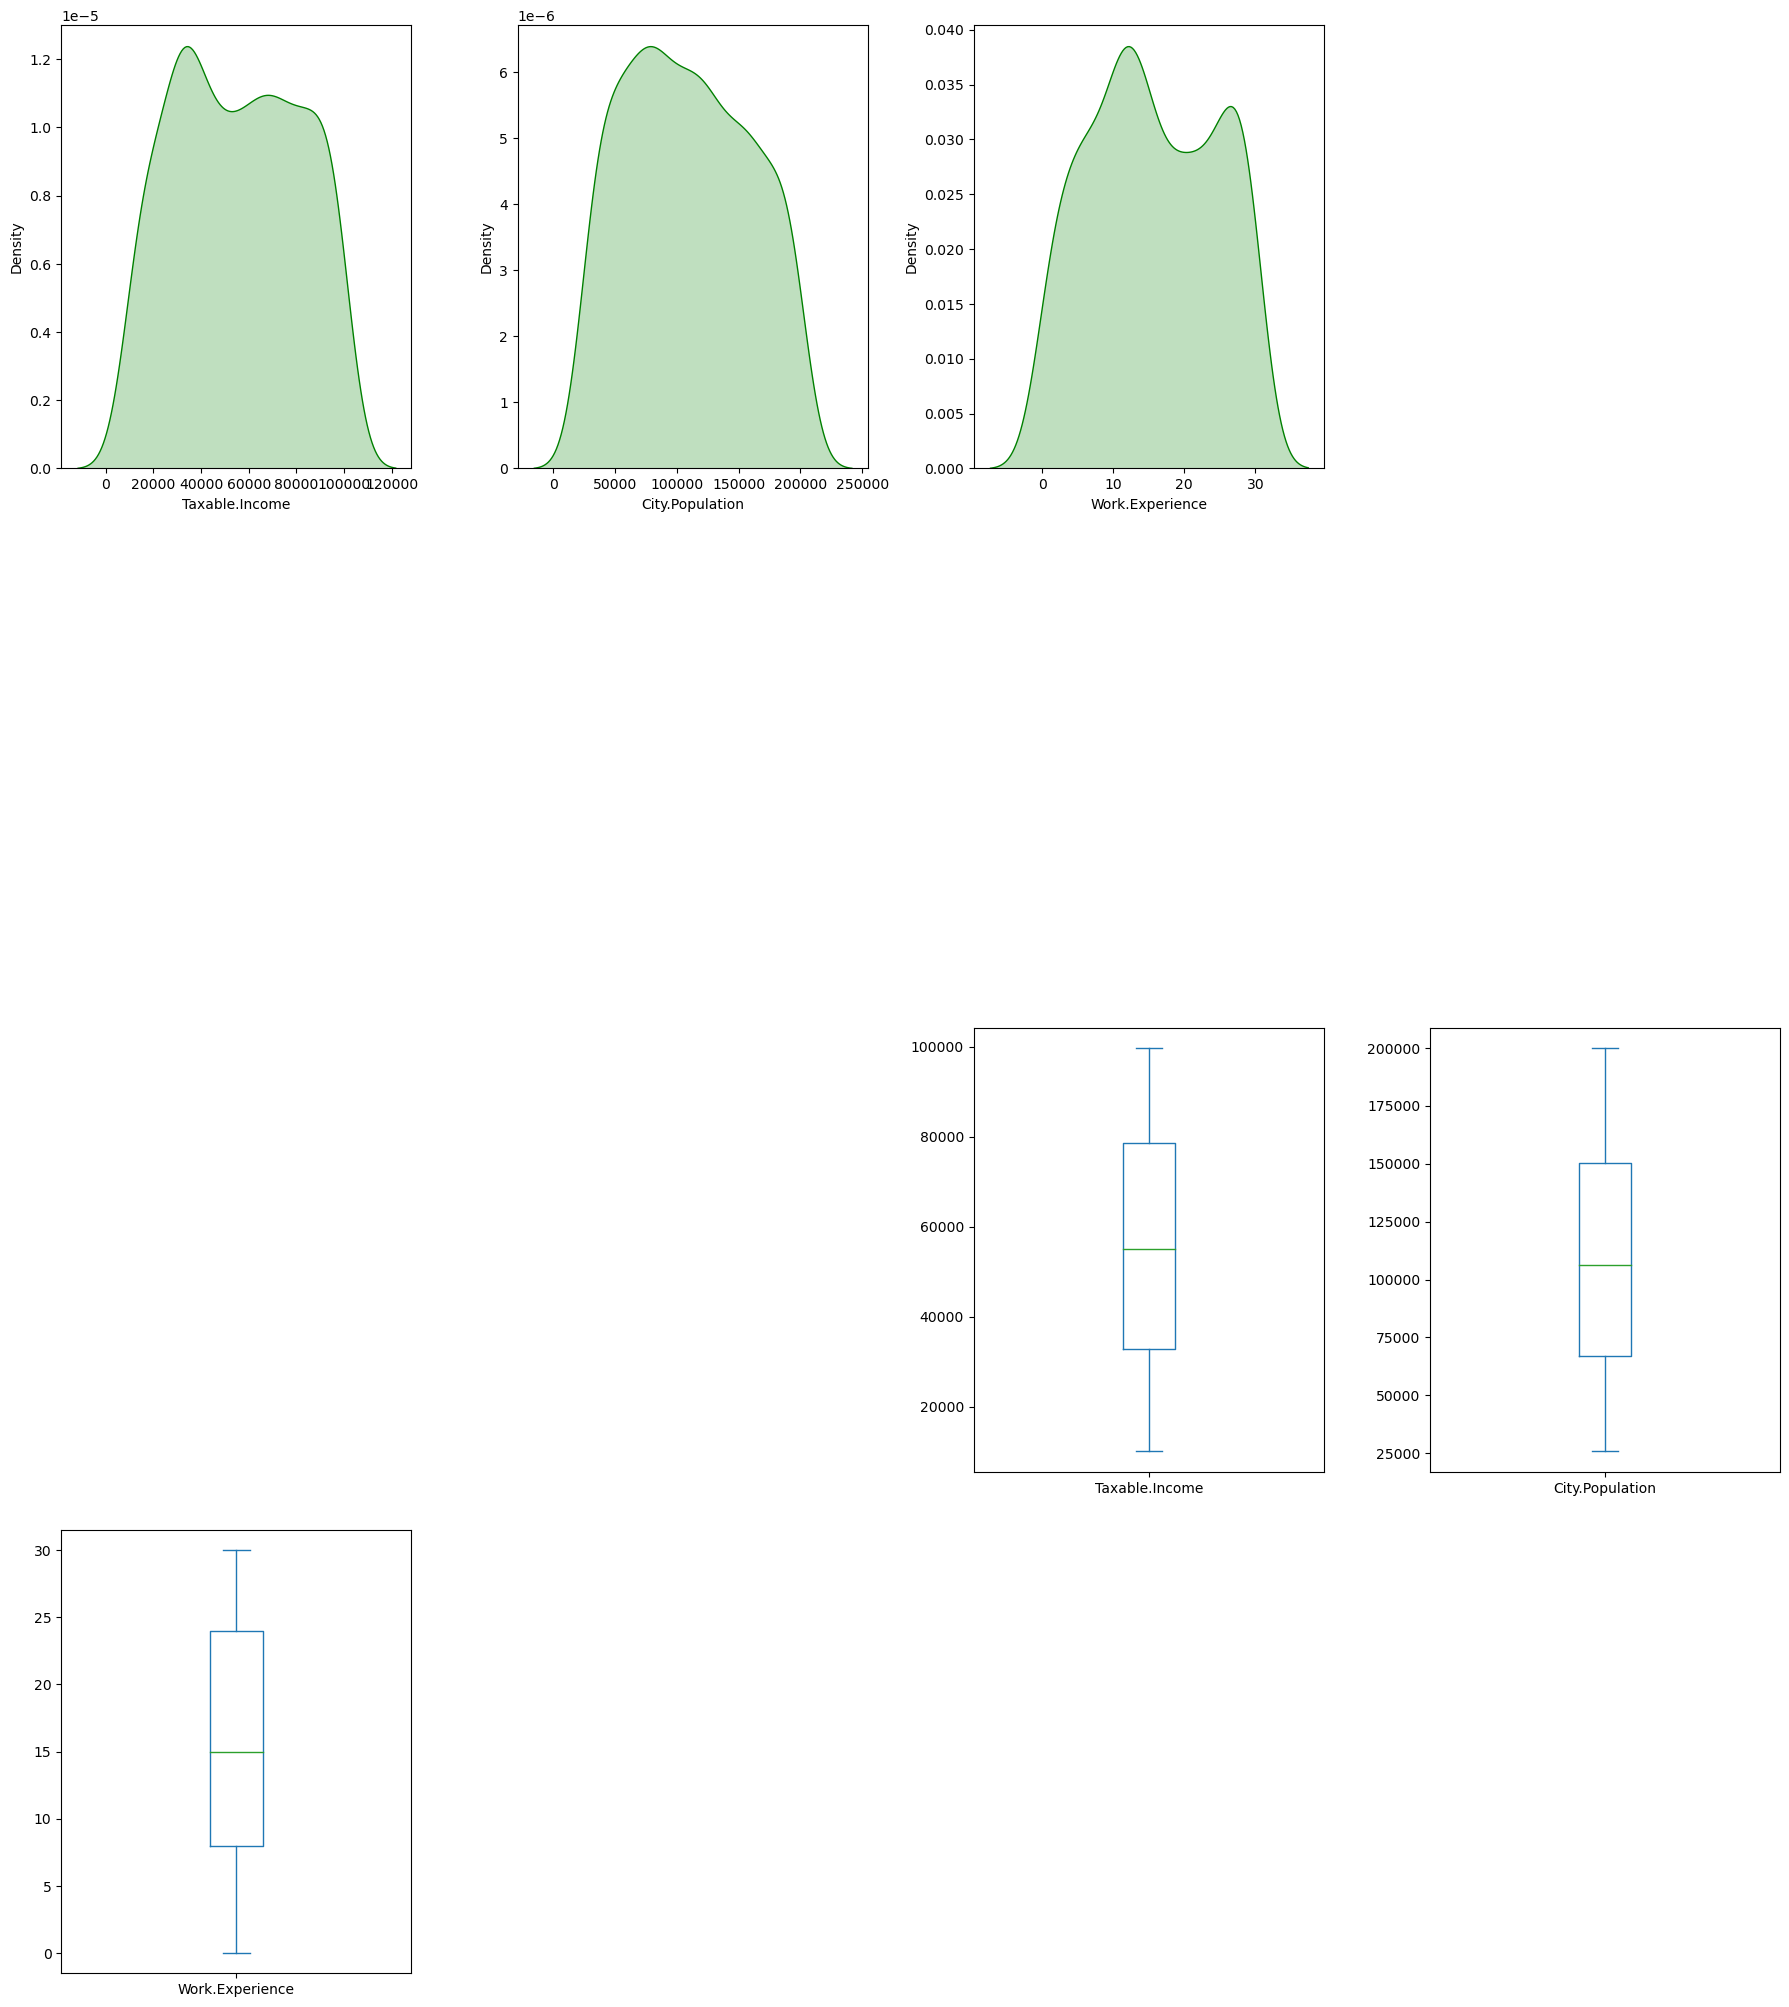

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [15]:
plt.figure(figsize=(18,40))
for i,col in enumerate(col_num,1):
  plt.subplot(8,4,i)
  sns.kdeplot(fraud[col],color='g',shade=True)
  plt.subplot(8,4,i+10)
  fraud[col].plot.box()
plt.tight_layout()
plt.show()
num_data=fraud[col_num]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [16]:
corr = fraud.corr()

In [17]:
fraud = pd.get_dummies(fraud,columns = ['Undergrad','Marital.Status','Urban'])

<AxesSubplot:>

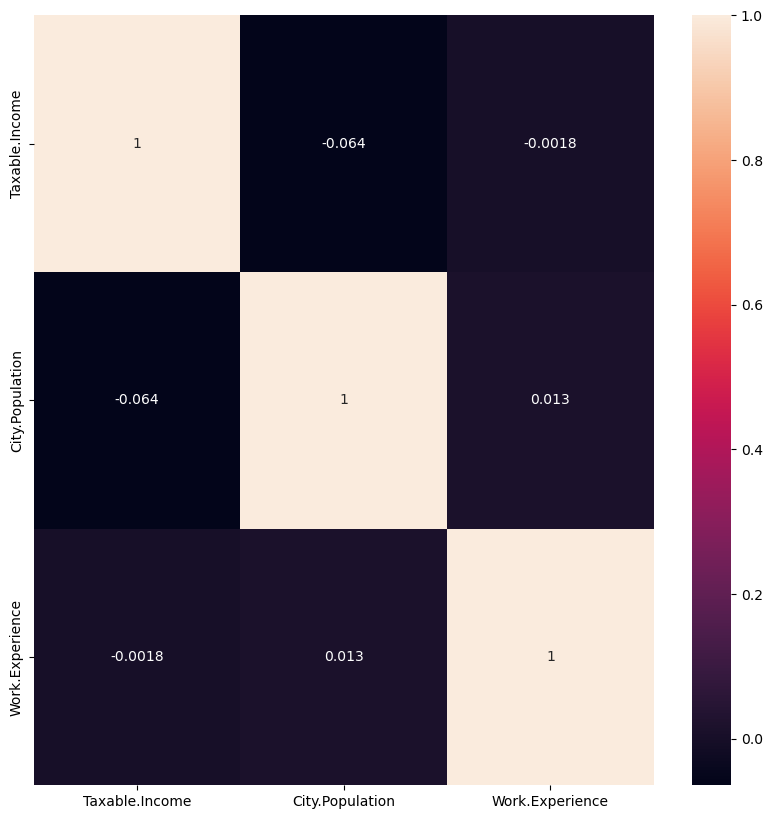

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [19]:
fraud['Taxable.Income']=pd.cut(fraud['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [20]:
x = fraud.iloc[:,1:10]
y = fraud.iloc[:,0]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
x_train

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
363,52584,7,0,1,0,0,1,0,1
386,140642,27,1,0,0,0,1,0,1
465,116282,21,1,0,1,0,0,1,0
243,181549,10,1,0,1,0,0,0,1
24,28495,30,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
389,183187,5,0,1,0,0,1,0,1
408,77059,22,0,1,1,0,0,1,0
519,162102,25,0,1,0,0,1,0,1
306,185099,12,0,1,1,0,0,1,0


In [23]:
x_test

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
4,27533,28,1,0,0,1,0,1,0
88,63896,24,1,0,0,1,0,0,1
143,154013,11,0,1,0,0,1,1,0
34,183767,1,0,1,1,0,0,0,1
359,157299,11,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
273,58942,20,0,1,1,0,0,1,0
484,114646,28,0,1,0,1,0,0,1
289,196816,14,1,0,0,0,1,1,0
196,28410,21,0,1,0,1,0,1,0


In [24]:
y_train

363    risky
386     good
465    risky
243     good
24      good
       ...  
389     good
408     good
519     good
306     good
333    risky
Name: Taxable.Income, Length: 480, dtype: category
Categories (2, object): ['risky' < 'good']

In [25]:
y_test

4       good
88      good
143    risky
34     risky
359     good
       ...  
273     good
484     good
289     good
196    risky
268     good
Name: Taxable.Income, Length: 120, dtype: category
Categories (2, object): ['risky' < 'good']

In [26]:
y_train.value_counts()

good     383
risky     97
Name: Taxable.Income, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs=4,n_estimators = 150,oob_score = True,criterion = 'entropy')
model.fit(x_train,y_train)
model.oob_score_

0.725

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pred_train = model.predict(x_train)
print('TRAIN DATA\n\nACCURACY SCORE: ',accuracy_score(y_train,pred_train))
print('\n•CONFUSION MATRIX: \n',confusion_matrix(y_train,pred_train))

TRAIN DATA

ACCURACY SCORE:  1.0

•CONFUSION MATRIX: 
 [[383   0]
 [  0  97]]


In [29]:
pred_test = model.predict(x_test)
print('TEST DATA\n\n•ACCURACY SCORE: ',accuracy_score(y_test,pred_test))
print('\n\n•CONFUSION MATRIX: \n',confusion_matrix(y_test,pred_test))

TEST DATA

•ACCURACY SCORE:  0.725


•CONFUSION MATRIX: 
 [[85  8]
 [25  2]]


In [30]:
fraud_t = pd.DataFrame({'Actual':y_test,'Predicted':pred_test})

In [31]:
fraud_t

,Actual,Predicted
4,good,good
88,good,good
143,risky,good
34,risky,good
359,good,good
...,...,...
273,good,good
484,good,good
289,good,risky
196,risky,good


In [32]:
columns = list(fraud.columns)
predictors = columns[1:10]
target = columns[0]

In [33]:
rf_small = RF(n_estimators=10,max_depth=3)

In [34]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [35]:
model.feature_importances_

array([0.52085573, 0.3530517 , 0.01646553, 0.01663312, 0.01633243,
       0.02033343, 0.01857294, 0.0184892 , 0.01926592])

In [36]:
FI = pd.DataFrame({'feature':list(x_train.columns),'importance':model.feature_importances_}).sort_values('importance',ascending=True)

In [37]:
FI

,feature,importance
4,Marital.Status_Divorced,0.016332
2,Undergrad_NO,0.016466
3,Undergrad_YES,0.016633
7,Urban_NO,0.018489
6,Marital.Status_Single,0.018573
8,Urban_YES,0.019266
5,Marital.Status_Married,0.020333
1,Work.Experience,0.353052
0,City.Population,0.520856
